In [96]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, exposure, restoration
from skimage.filters import threshold_local, threshold_otsu
from skimage.feature import canny
from scipy.signal import convolve2d as conv2

In [3]:
image = plt.imread('./image-rescaled.png')

(824, 376)


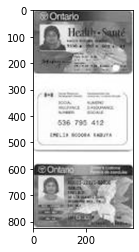

In [4]:
gray_image = color.rgb2gray(image)
print(gray_image.shape)
plt.imshow(gray_image, cmap='gray')

(824, 376)


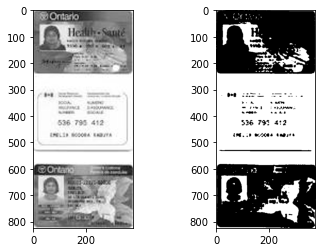

In [38]:
thresh = threshold_otsu(gray_image)
binary_global = gray_image > thresh
print(binary_global.shape)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray_image, cmap='gray')
ax[1].imshow(binary_global, cmap='gray')

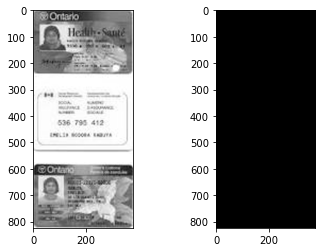

In [46]:
block_size = 35
local_thresh = threshold_local(gray_image, block_size, offset=5)

binary_local = gray_image > local_thresh

fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray_image, cmap='gray')
ax[1].imshow(binary_local, cmap='gray')

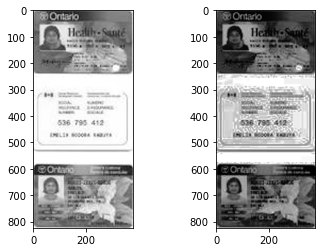

In [54]:
hist_eq_image = exposure.equalize_hist(gray_image)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray_image, cmap='gray')
ax[1].imshow(hist_eq_image, cmap='gray')

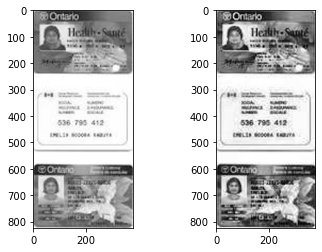

In [57]:
adapt_eq_image = exposure.equalize_adapthist(gray_image)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray_image, cmap='gray')
ax[1].imshow(adapt_eq_image, cmap='gray')

plt.imsave('adaptive_equalized_gray_image.png', adapt_eq_image, cmap='gray')

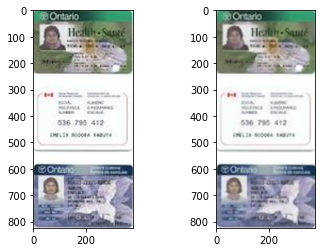

In [59]:
denoised_image = restoration.denoise_tv_chambolle(image, weight=0.1, multichannel=True)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(denoised_image)

# plt.imsave('adaptive_equalized_gray_image.png', adapt_eq_image, cmap='gray')

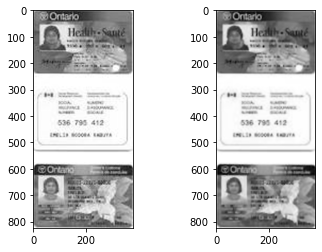

In [64]:
denoised_gray_image = restoration.denoise_tv_chambolle(gray_image, weight=0.1)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray_image, cmap='gray')
ax[1].imshow(denoised_gray_image, cmap='gray')

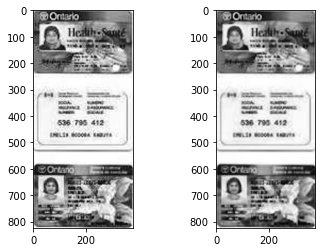

In [67]:
denoised_gray_eq_image = restoration.denoise_tv_chambolle(adapt_eq_image, weight=0.1)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(adapt_eq_image, cmap='gray')
ax[1].imshow(denoised_gray_eq_image, cmap='gray')

plt.imsave('denoised_adapt_eq_gray_image.png', denoised_gray_eq_image, cmap='gray')

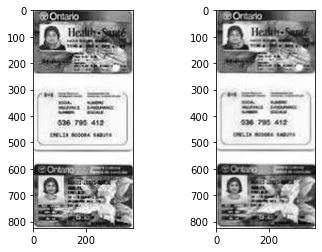

In [69]:
denoised_gray_eq_image = restoration.denoise_bilateral(adapt_eq_image)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(adapt_eq_image, cmap='gray')
ax[1].imshow(denoised_gray_eq_image, cmap='gray')

plt.imsave('denoised_adapt_eq_gray_image-2.png', denoised_gray_eq_image, cmap='gray')

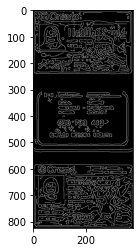

In [98]:
canny_edges = canny(adapt_eq_image, sigma=1.7)

plt.imshow(canny_edges, cmap='gray')

plt.imsave('canny_edge_adapt_eq_gray_image.png', canny_edges, cmap='gray')

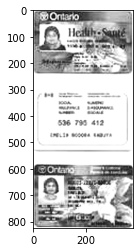

In [200]:
psf = np.ones( (2,2) ) / 5
deconv, _ = restoration.unsupervised_wiener(adapt_eq_image, psf)

plt.imshow(deconv, cmap='gray')
plt.imsave('deconv_adap_eq_gray_image.png', deconv, cmap='gray')

In [258]:
plt.imread?

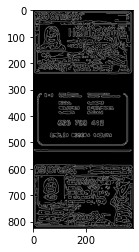

In [251]:
canny_edges = canny(deconv, 1.2)

plt.imshow(canny_edges, cmap='gray')

plt.imsave('canny_edge_deconv_gray_image.png', canny_edges, cmap='gray')

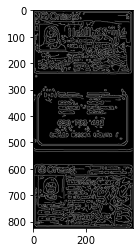

In [267]:
gan_deblurred = plt.imread('./adaptive_equalized_gray_imageDeblurred.png')  # The image is already gray but for some reason its being loaded with multidimensions like rgb
gan_deblurred_gray = color.rgb2gray(gan_deblurred_gray)

canny_edges = canny(gan_deblurred_gray, 1.9)
plt.imshow(canny_edges, cmap='gray')

plt.imsave('canny_edge_gan_deblurred_gray_image.png', canny_edges, cmap='gray')